## Matrices Comparison
### Tian Cheng

This notebook compares performance of various machine learning models and nerual network classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import _pickle as cPickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as prf
from keras.models import model_from_json


Using TensorFlow backend.
/anaconda/envs/em_hack_mac/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('./data/ny_hmda_2015_minmax.csv')
df2 = pd.read_csv('./data/ny_hmda_2015_normalize.csv')
x = np.array(df.drop(['action_taken'],1)) 
y = np.array(df['action_taken'])
x2 = np.array(df2.drop(['action_taken'],1)) 
y2 = np.array(df2['action_taken'])
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

pos = [1, 3, 5, 7, 9, 11, 13, 15]
#testy = [0.76, 0.83, 0.88, 0.867, 0.872, 0.863]
accuracy_list = []
precision_list = []
recall_list = []
fscore_list = []

LOGREG_MODEL = cPickle.load(open('models/logreg_model.p', 'rb'))
KNN_MODEL = cPickle.load(open('models/knn_minmax_model.p', 'rb'))
RF_MODEL = cPickle.load(open('models/random_forest_model.p', 'rb'))
LINEAR_SVC_MODEL = cPickle.load(open('models/linear_svc_model.p', 'rb'))
SVC_MODEL = cPickle.load(open('models/svc_model.p', 'rb'))
NB_MODEL = cPickle.load(open('models/gaussian_nb_model.p', 'rb'))

nn_file = open('models/model.json', 'r')
LOADED_MODEL_NN = nn_file.read()
nn_file.close()
NN_MODEL = model_from_json(LOADED_MODEL_NN)
NN_MODEL.load_weights('models/model.h5')
NN_MODEL.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


accuracy_list.append(LOGREG_MODEL.score(x,y))
p, r, f, s = prf(y, LOGREG_MODEL.predict(x), average = "macro")
precision_list.append(p)
recall_list.append(r)
fscore_list.append(f)

print(accuracy_list)
print(precision_list)
print(recall_list)
print(fscore_list)


[0.82422526532736984]
[0.79808243834816317]
[0.80427566006426066]
[0.80098712345792733]


In [3]:
#accuracy_list.append(KNN_MODEL.score(x,y))
#p, r, f, s = prf(y, KNN_MODEL.predict(x), average = "macro")
accuracy_list.append(0.830194943164)
precision_list.append(0.804756132696)
recall_list.append(0.812944171699)
fscore_list.append(0.808517763177)

print(accuracy_list)
print(precision_list)
print(recall_list)
print(fscore_list)

[0.82422526532736984, 0.830194943164]
[0.79808243834816317, 0.804756132696]
[0.80427566006426066, 0.812944171699]
[0.80098712345792733, 0.808517763177]


In [4]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('./data/ny_hmda_2015_minmax.csv')
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
#accuracy_list.append(RF_MODEL.score(x,y))
#p, r, f, s = prf(y, RF_MODEL.predict(x), average = "macro")
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
accuracy_list.append(RF.score(x_test,y_test))
p, r, f, s = prf(y_test, RF.predict(x_test), average = "macro")
precision_list.append(p)
recall_list.append(r)
fscore_list.append(f)
print(accuracy_list)
print(precision_list)
print(recall_list)
print(fscore_list)


[0.82422526532736984, 0.830194943164, 0.82995591203654517]
[0.79808243834816317, 0.804756132696, 0.80321257675769231]
[0.80427566006426066, 0.812944171699, 0.82143685989066895]
[0.80098712345792733, 0.808517763177, 0.81055026956315124]


In [5]:
accuracy_list.append(LINEAR_SVC_MODEL.score(x,y))
p, r, f, s = prf(y, LINEAR_SVC_MODEL.predict(x), average = "macro")
precision_list.append(p)
recall_list.append(r)
fscore_list.append(f)

print(accuracy_list)
print(precision_list)
print(recall_list)
print(fscore_list)


[0.82422526532736984, 0.830194943164, 0.82995591203654517, 0.82695556098545608]
[0.79808243834816317, 0.804756132696, 0.80321257675769231, 0.80139031274092321]
[0.80427566006426066, 0.812944171699, 0.82143685989066895, 0.80547722781500353]
[0.80098712345792733, 0.808517763177, 0.81055026956315124, 0.80335323330143293]


In [6]:
#accuracy_list.append(SVC_MODEL.score(x,y))
#p, r, f, s = prf(y, SVC_MODEL.predict(x), average = "macro")
accuracy_list.append(0.828362371189)
precision_list.append(0.80404042310433033)
recall_list.append(0.7993524175376593)
fscore_list.append(0.80160063210560828)
#precision_list.append(p)
#recall_list.append(r)
#fscore_list.append(f)

print(accuracy_list)
print(precision_list)
print(recall_list)
print(fscore_list)

[0.82422526532736984, 0.830194943164, 0.82995591203654517, 0.82695556098545608, 0.828362371189]
[0.79808243834816317, 0.804756132696, 0.80321257675769231, 0.80139031274092321, 0.8040404231043303]
[0.80427566006426066, 0.812944171699, 0.82143685989066895, 0.80547722781500353, 0.7993524175376593]
[0.80098712345792733, 0.808517763177, 0.81055026956315124, 0.80335323330143293, 0.8016006321056083]


In [7]:
accuracy_list.append(NB_MODEL.score(x,y))
p, r, f, s = prf(y, NB_MODEL.predict(x), average = "macro")
precision_list.append(p)
recall_list.append(r)
fscore_list.append(f)

print(accuracy_list)
print(precision_list)
print(recall_list)
print(fscore_list)

[0.82422526532736984, 0.830194943164, 0.82995591203654517, 0.82695556098545608, 0.828362371189, 0.75090301607368615]
[0.79808243834816317, 0.804756132696, 0.80321257675769231, 0.80139031274092321, 0.8040404231043303, 0.78182242715695849]
[0.80427566006426066, 0.812944171699, 0.82143685989066895, 0.80547722781500353, 0.7993524175376593, 0.81594624469719212]
[0.80098712345792733, 0.808517763177, 0.81055026956315124, 0.80335323330143293, 0.8016006321056083, 0.7480487350329672]


In [8]:
score = NN_MODEL.evaluate(x2, y2, verbose=0)
accuracy_list.append(score[1])
p, r, f, support = prf(y2, [round(x[0]) for x in NN_MODEL.predict(x2)],average="macro")
precision_list.append(p)
recall_list.append(r)
fscore_list.append(f)

print(accuracy_list)
print(precision_list)
print(recall_list)
print(fscore_list)

[0.82422526532736984, 0.830194943164, 0.82995591203654517, 0.82695556098545608, 0.828362371189, 0.75090301607368615, 0.84756557490252737]
[0.79808243834816317, 0.804756132696, 0.80321257675769231, 0.80139031274092321, 0.8040404231043303, 0.78182242715695849, 0.82768981041373479]
[0.80427566006426066, 0.812944171699, 0.82143685989066895, 0.80547722781500353, 0.7993524175376593, 0.81594624469719212, 0.8197943589088994]
[0.80098712345792733, 0.808517763177, 0.81055026956315124, 0.80335323330143293, 0.8016006321056083, 0.7480487350329672, 0.82350008714287348]


In [9]:
# add combination model score
accuracy_list.append(0.84995)

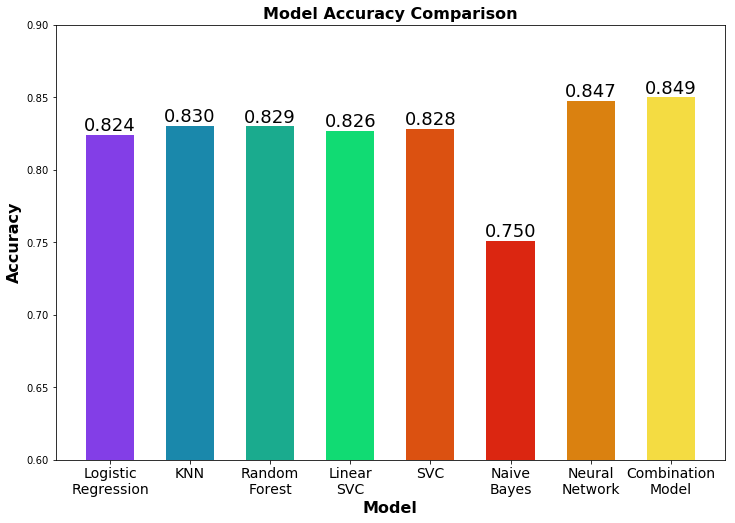

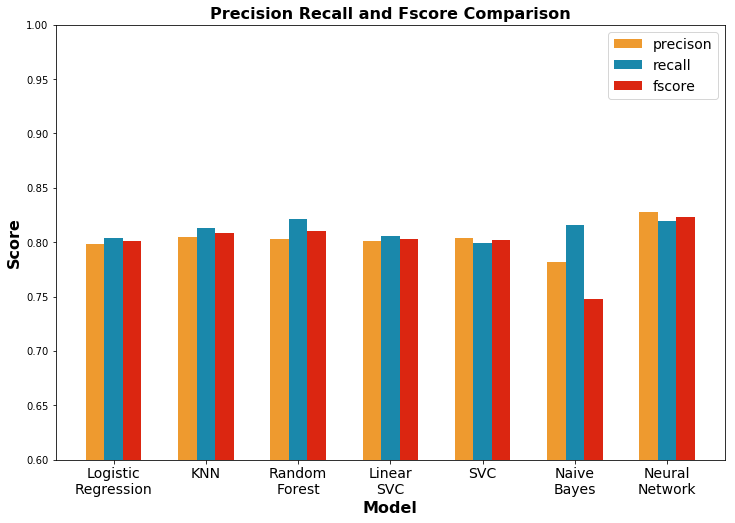

In [10]:
#fig, ax = plt.subplots()
plt.clf()
plt.figure(figsize=(12, 8))
colors = ['#833EE7','#1A88AB', '#1AAB8E', '#11DB73', '#DB5111', '#DB2611', '#DA8110', '#f4dc42']
plt.title('Model Accuracy Comparison', fontweight='bold', fontsize = '16')
plt.xlabel('Model', fontweight='bold', fontsize = '16')
plt.ylabel('Accuracy', fontweight='bold',fontsize = '16')
#plt.yscale('log')
plt.ylim([0.6,0.9])
#plt.ylim([0,1])
rects = plt.bar(pos, accuracy_list, width = 1.2, color=colors)

for rect, label in zip(rects, accuracy_list):
    height = rect.get_height()
    rect.color = colors[0]
    plt.text(rect.get_x() + rect.get_width()/2, height*1.0001, str(label)[0:5], ha='center', va='bottom', fontsize = '18')

plt.xticks(pos, ('Logistic\nRegression', 'KNN', 'Random\nForest', 'Linear\nSVC', 'SVC', 'Naive\nBayes', 'Neural\nNetwork', 'Combination\nModel'), fontsize = '14')
plt_temp = plt
plt.show()
plt_temp.show()
plt.savefig('./data/model_comparison.png')

## precision recall and fscore

plt.clf()
N = 7
#precision_list = [0.5, 0.6, 0.7, 0.55, 0.45, 0.8]
#recall_list = [0.8, 0.6, 0.8, 0.4, 0.65, 0.7]
#fscore_list = [0.87, 0.8, 0.65, 0.54, 0.74, 0.77]

ind = np.arange(N)
width = 0.2
plt.figure(figsize=(12, 8))
plt.title('Precision Recall and Fscore Comparison', fontweight='bold', fontsize = '16')
plt.xlabel('Model', fontweight='bold', fontsize = '16')
plt.ylabel('Score', fontweight='bold', fontsize = '16')
plt.ylim([0.6,1.0])
plt.xticks(ind, ('Logistic\nRegression', 'KNN', 'Random\nForest', 'Linear\nSVC', 'SVC', 'Naive\nBayes', 'Neural\nNetwork'), fontsize = '14')
rects1 = plt.bar(ind, recall_list, width = width, color = '#1A88AB')
rects2 = plt.bar(ind - width, precision_list, width = width, color = '#EE9A2F')
rects3 = plt.bar(ind + width, fscore_list, width = width, color = '#DB2611')
plt.legend([rects2, rects1, rects3],['precison','recall','fscore'],fontsize = '14')
plt.show()
plt.savefig('./data/precision_recall_fscore.png')

In [11]:
print("                           " + "precision       "+ "recall          " + "fscore      ")
print("Logistic Regression:       " + str(precision_list[0]) + "  "+ str(recall_list[0]) + "  "+ str(fscore_list[0]))
print("K Nearesr Neighbor:        " + str(precision_list[1]) + "  "+ str(recall_list[1]) + "  "+ str(fscore_list[1]))
print("Random Forest:             " + str(precision_list[2]) + "  "+ str(recall_list[2]) + "  "+ str(fscore_list[2]))
print("Linear SVC:                " + str(precision_list[3]) + "  "+ str(recall_list[3]) + "  "+ str(fscore_list[3]))
print("Support Vector Classifier: " + str(precision_list[4]) + "  "+ str(recall_list[4]) + "  "+ str(fscore_list[4]))
print("Naive Bayes:               " + str(precision_list[5]) + "  "+ str(recall_list[5]) + "  "+ str(fscore_list[5]))
print("Nerual Network:            " + str(precision_list[6]) + "  "+ str(recall_list[6]) + "  "+ str(fscore_list[6]))


                           precision       recall          fscore      
Logistic Regression:       0.798082438348  0.804275660064  0.800987123458
K Nearesr Neighbor:        0.804756132696  0.812944171699  0.808517763177
Random Forest:             0.803212576758  0.821436859891  0.810550269563
Linear SVC:                0.801390312741  0.805477227815  0.803353233301
Support Vector Classifier: 0.8040404231043303  0.7993524175376593  0.8016006321056083
Naive Bayes:               0.781822427157  0.815946244697  0.748048735033
Nerual Network:            0.827689810414  0.819794358909  0.823500087143
